<a href="https://colab.research.google.com/github/AnandSinhaProjects/Making_ML_models_myself/blob/main/Time_Series/Delhi_Weather_Forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression

In [15]:
data = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

In [16]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [17]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


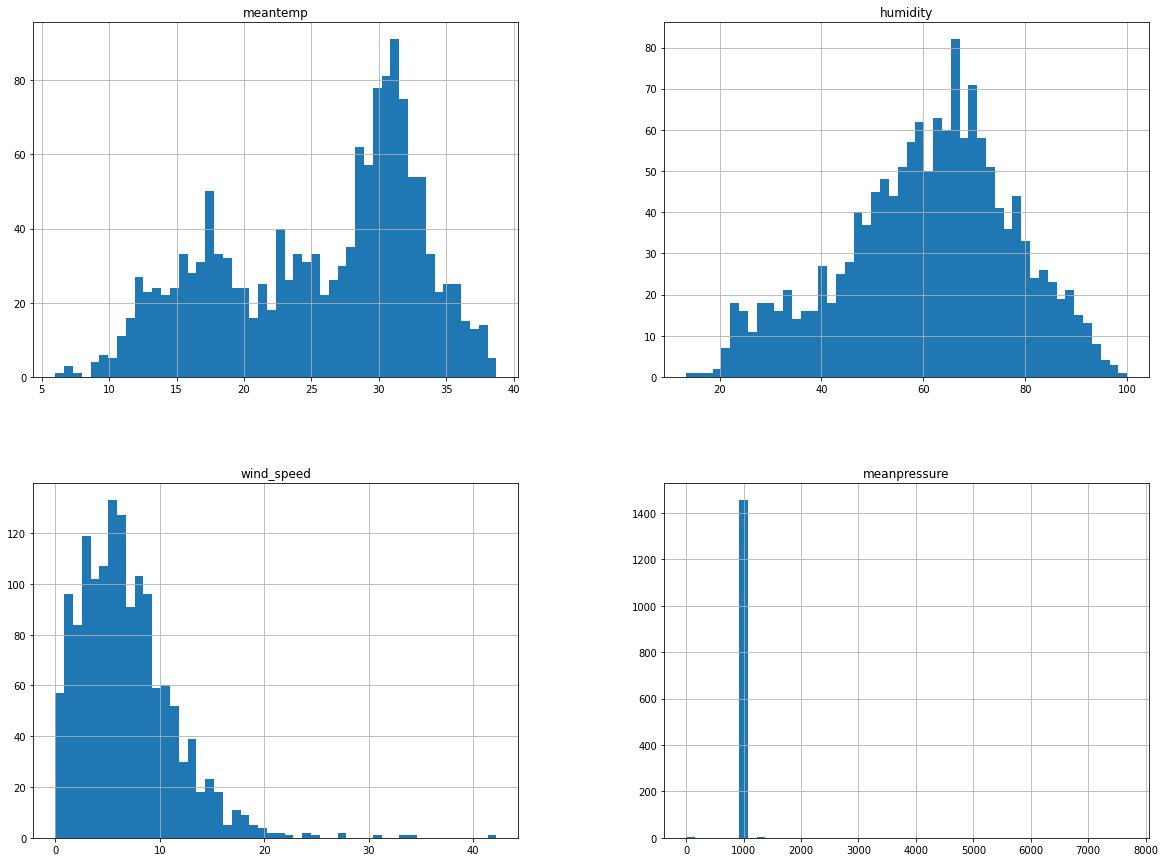

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

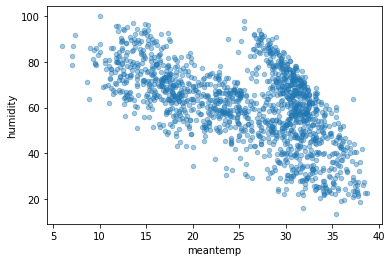

In [20]:
data.plot(kind='scatter', x='meantemp', y='humidity',alpha=0.4)

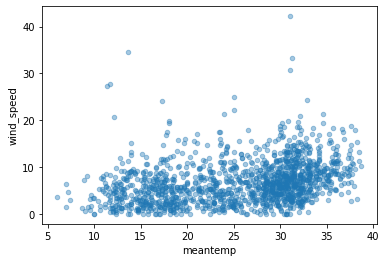

In [21]:
data.plot(kind='scatter', x='meantemp', y='wind_speed',alpha=0.4)

In [22]:
corr_matrix=data.corr()

In [23]:
corr_matrix

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.571951,0.306468,-0.038818
humidity,-0.571951,1.000000,-0.373972,0.001734
wind_speed,0.306468,-0.373972,1.000000,-0.020670
meanpressure,-0.038818,0.001734,-0.020670,1.000000


In [24]:
corr_matrix['meanpressure'].sort_values(ascending=False)

meanpressure    1.000000
humidity        0.001734
wind_speed     -0.020670
meantemp       -0.038818
Name: meanpressure, dtype: float64

In [25]:
corr_matrix['humidity'].sort_values(ascending=False)

humidity        1.000000
meanpressure    0.001734
wind_speed     -0.373972
meantemp       -0.571951
Name: humidity, dtype: float64

In [26]:
corr_matrix['wind_speed'].sort_values(ascending=False)

wind_speed      1.000000
meantemp        0.306468
meanpressure   -0.020670
humidity       -0.373972
Name: wind_speed, dtype: float64

In [27]:
corr_matrix['meantemp'].sort_values(ascending=False)

meantemp        1.000000
wind_speed      0.306468
meanpressure   -0.038818
humidity       -0.571951
Name: meantemp, dtype: float64

In [28]:
data=data.drop('meanpressure',axis='columns')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1462 non-null   object 
 1   meantemp    1462 non-null   float64
 2   humidity    1462 non-null   float64
 3   wind_speed  1462 non-null   float64
dtypes: float64(3), object(1)
memory usage: 45.8+ KB


In [30]:
corr_matrix=data.corr()

In [31]:
corr_matrix

,meantemp,humidity,wind_speed
meantemp,1.000000,-0.571951,0.306468
humidity,-0.571951,1.000000,-0.373972
wind_speed,0.306468,-0.373972,1.000000


In [32]:
data.head

<bound method NDFrame.head of             date   meantemp    humidity  wind_speed
0     2013-01-01  10.000000   84.500000    0.000000
1     2013-01-02   7.400000   92.000000    2.980000
2     2013-01-03   7.166667   87.000000    4.633333
3     2013-01-04   8.666667   71.333333    1.233333
4     2013-01-05   6.000000   86.833333    3.700000
...          ...        ...         ...         ...
1457  2016-12-28  17.217391   68.043478    3.547826
1458  2016-12-29  15.238095   87.857143    6.000000
1459  2016-12-30  14.095238   89.666667    6.266667
1460  2016-12-31  15.052632   87.000000    7.325000
1461  2017-01-01  10.000000  100.000000    0.000000

[1462 rows x 4 columns]>

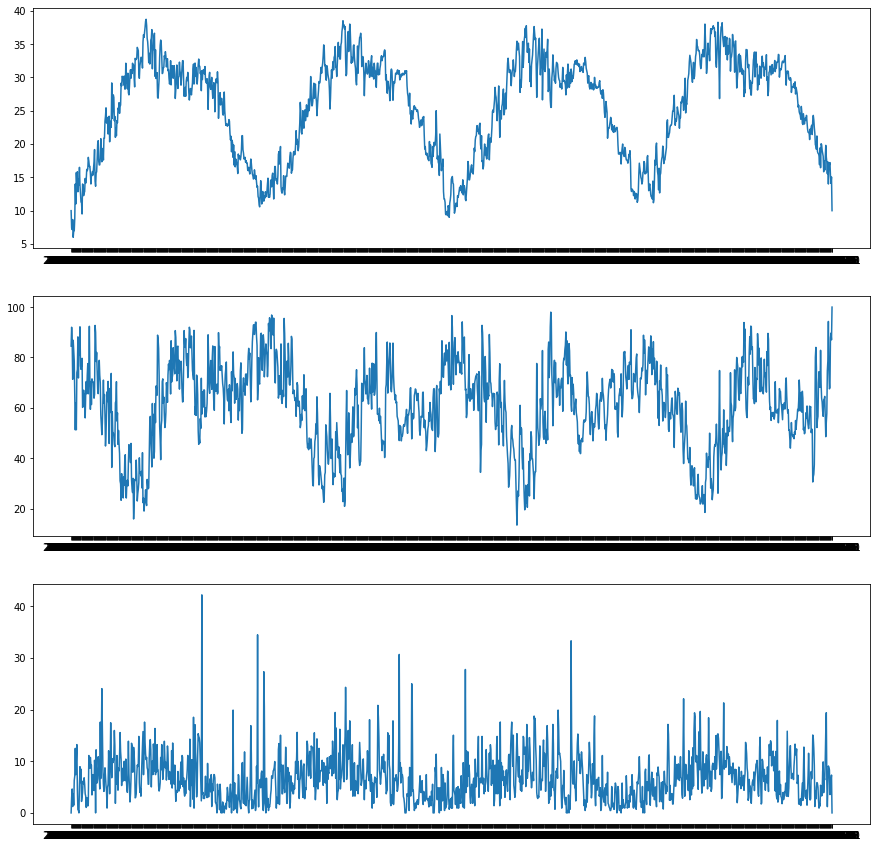

In [33]:
fig,ax=plt.subplots(3,figsize=(15,15))
ax[0].plot(data.date, data.meantemp)
ax[1].plot(data.date, data.humidity)
ax[2].plot(data.date, data.wind_speed)

In [34]:
test = pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [35]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [36]:
train_df=data

In [37]:
train_df

,date,meantemp,humidity,wind_speed
0,2013-01-01,10.000000,84.500000,0.000000
1,2013-01-02,7.400000,92.000000,2.980000
2,2013-01-03,7.166667,87.000000,4.633333
3,2013-01-04,8.666667,71.333333,1.233333
4,2013-01-05,6.000000,86.833333,3.700000
...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826
1458,2016-12-29,15.238095,87.857143,6.000000
1459,2016-12-30,14.095238,89.666667,6.266667
1460,2016-12-31,15.052632,87.000000,7.325000


In [38]:
train_df['date']=pd.to_datetime(train_df['date'])
test_df=test
test_df['date']=pd.to_datetime(test_df['date'])

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1462 non-null   datetime64[ns]
 1   meantemp    1462 non-null   float64       
 2   humidity    1462 non-null   float64       
 3   wind_speed  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 45.8 KB


In [40]:
#Changing Date to the indexes

train_df=train_df.set_index('date')
test_df=test_df.set_index('date')

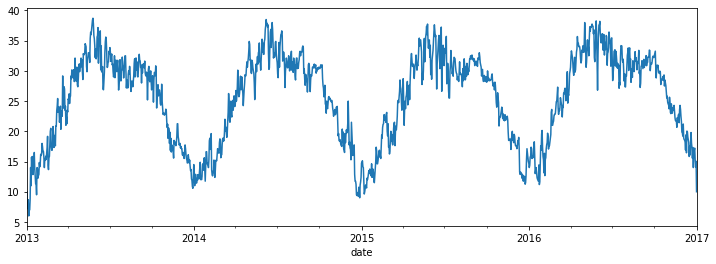

In [41]:
train_df['meantemp'].plot(figsize=(12,4)) #Simple Plot for Time Series

In [42]:
!pip install calplot

In [43]:
import calplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
from pylab import rcParams

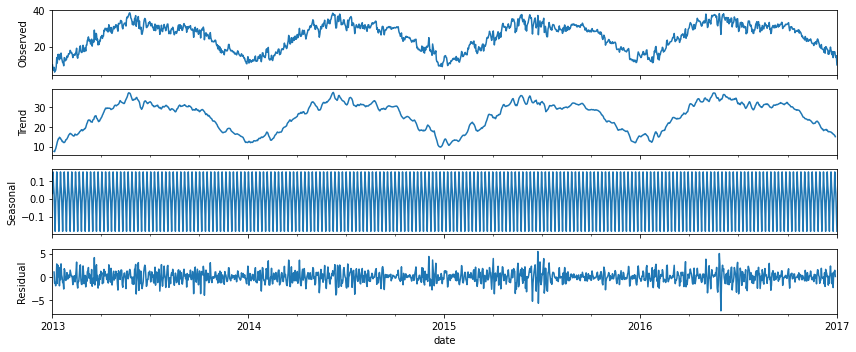

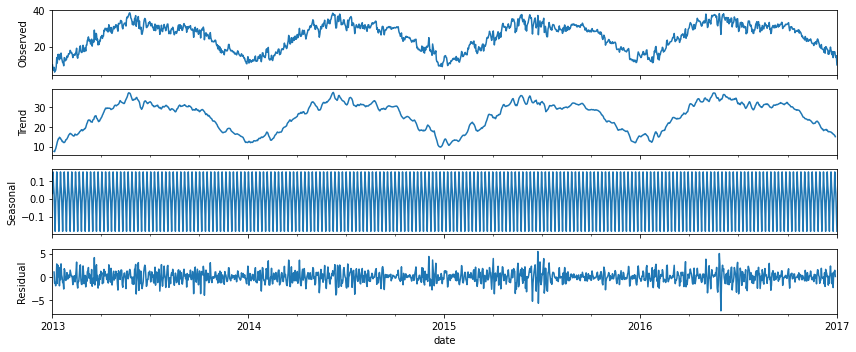

In [45]:
#Since there is seasonality in the dataset we can use ETS Decompositions to view the graphs

ets_result=seasonal_decompose(train_df['meantemp'], model='additive')
rcParams['figure.figsize']=(12,5)
ets_result.plot()

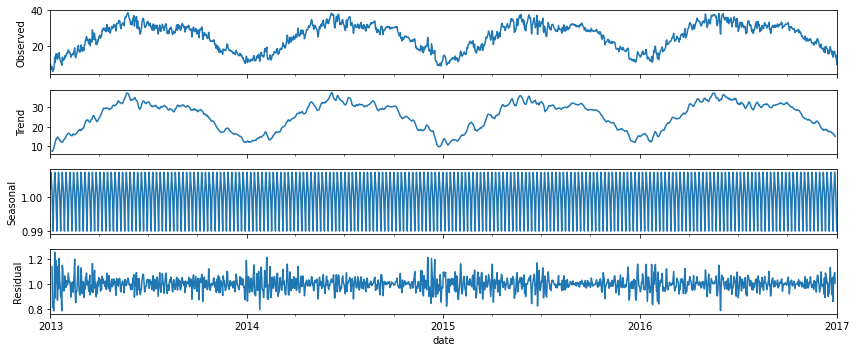

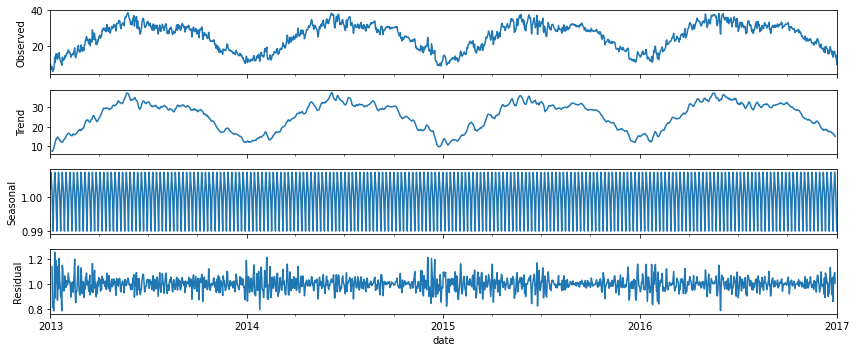

In [46]:
#Since there is seasonality in the dataset we can use ETS Decompositions to view the graphs

ets_result=seasonal_decompose(train_df['meantemp'], model='multiplicative')
rcParams['figure.figsize']=(12,5)
ets_result.plot()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x612 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdb1610290>,
       dtype=object))

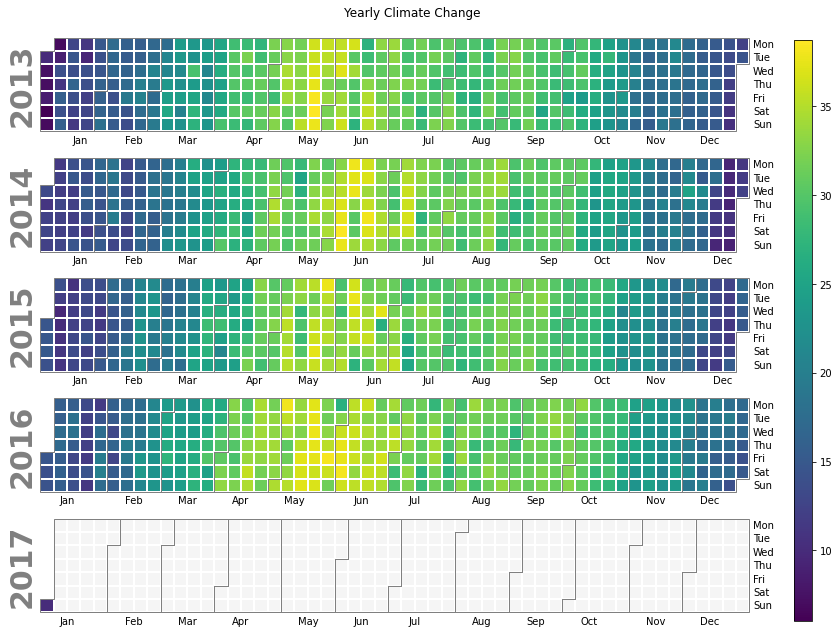

In [47]:
calplot.calplot(train_df['meantemp'], suptitle='Yearly Climate Change')

In [48]:
dd=np.asarray(train_df.meantemp)
test_df['naive']=dd[len(dd)-1]

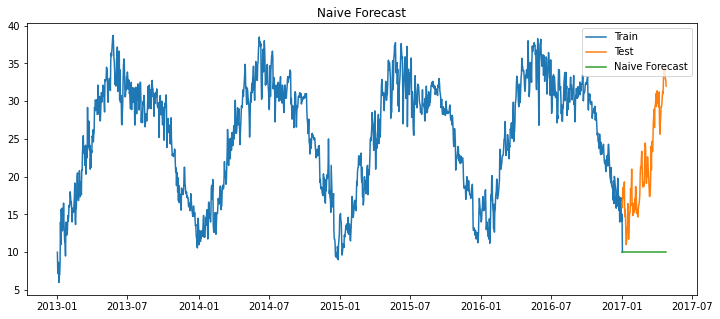

In [49]:
plt.figure(figsize=(12,5))
plt.plot(train_df.index, train_df['meantemp'], label='Train')
plt.plot(test_df.index,test_df['meantemp'], label='Test')
plt.plot(test_df.index,test_df['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [50]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [51]:
rms = sqrt(mean_squared_error(test_df.meantemp, test_df.naive))
print(rms)

13.315100549507218


In [72]:
train_df

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000000,84.500000,0.000000
2013-01-02,7.400000,92.000000,2.980000
2013-01-03,7.166667,87.000000,4.633333
2013-01-04,8.666667,71.333333,1.233333
2013-01-05,6.000000,86.833333,3.700000
...,...,...,...
2016-12-28,17.217391,68.043478,3.547826
2016-12-29,15.238095,87.857143,6.000000
2016-12-30,14.095238,89.666667,6.266667


In [56]:
#Fitting ARIMA 

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [82]:
new_train_df=train_df
new_train_df.drop(['humidity','wind_speed'],axis='columns')

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


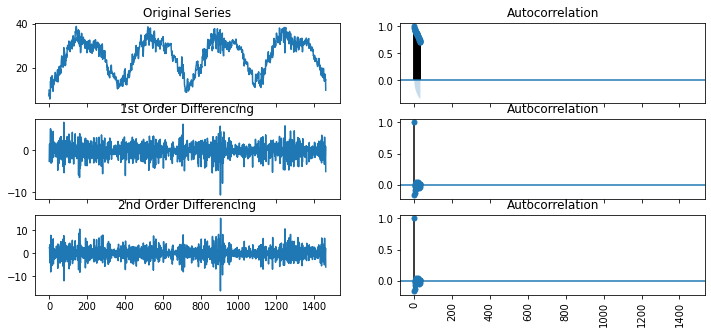

In [88]:
#Decomposition 
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(new_train_df['meantemp'].values); 
axes[0, 0].set_title('Original Series')
plot_acf(new_train_df['meantemp'].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(new_train_df['meantemp'].diff().values)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(new_train_df['meantemp'].diff().dropna().values,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(new_train_df['meantemp'].diff().diff().values)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(new_train_df['meantemp'].diff().dropna().values,ax=axes[2, 1])

plt.xticks(rotation='vertical')
plt.show()


In [89]:
acf_lag=acf(train_df['meantemp'].diff().dropna().values, nlags=5)
pacf_lag=pacf(train_df['meantemp'].diff().dropna().values, nlags=5, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
